In [1]:
import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm

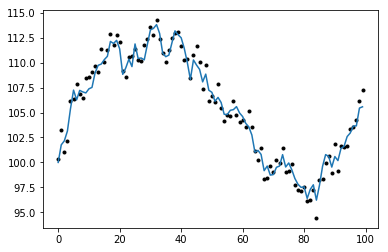

In [2]:
# Generate synthetic data
np.random.seed(0)
n = 100
a  = np.zeros(n) # create an array of 0's of length n
s = 1 # controls how fast true mean moves
a[0] = 100
for i in range(1,n):
    a[i] = a[i-1] + s*randn()
noise_std = 0.8
x = a + noise_std*randn(n)

plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)

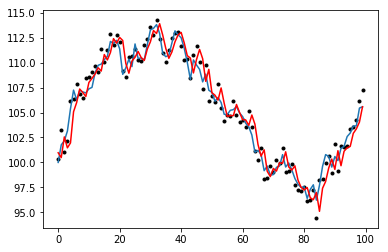

In [3]:
# fit = SimpleExpSmoothing(x).fit(smoothing_level=0.1,optimized=False) # choose smoothing level explicitly
fit = SimpleExpSmoothing(x).fit() # choose smoothing level to best fit data
xhat = fit.fittedvalues
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')

* Change noise std and s and see how it affects x.
* Change the alpha parameter to see how it affects the red line, and to make the red line track x.
* Remove the arguments to fit() to let SimpleExpSmoothing fit alpha for you.
* How does the optimal value of alpha change as you change noise std and s?

In [4]:
# fit.params shows the chosen values for all parameters 
fit.params

{'smoothing_level': 0.7438146065557812,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 100.96909470362732,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

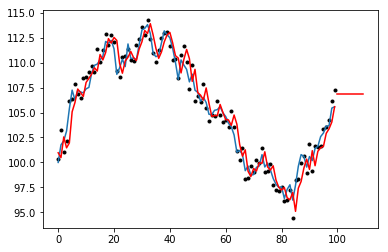

In [5]:
# forecast, too!
xhat = fit.fittedvalues
l = 10
forecast = fit.forecast(l)

# plot with forecast
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')
plt.plot(range(n,n+l), forecast, color='red')

# Holt's method: add a trend

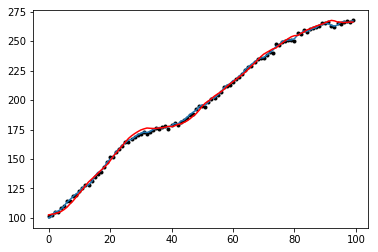

In [6]:
np.random.seed(0)
n = 100
a = np.zeros(n)
b = np.zeros(n)
a[0] = 100 # initial level
b[0] = 1 # initial trend

for i in range(1,n):
    b[i] = b[i-1] + 0.2*randn()      # trend changes slowly
    a[i] = a[i-1] + b[i-1] + randn() # level moves with the trend + extra random movement

# We observe the level + extra noise
x = a + .9*randn(n) 

# fit the model
fit = Holt(x).fit(smoothing_level=0.2,smoothing_slope=.5,optimized=False)
# fit = Holt(x).fit()
xhat = fit.fittedvalues

# plot
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')

Suppose I change the code to set initial value of trend b[0] = -1. What will happen?
* (up) The blue line will trend downward
* (down) The blue line will trend upward more quickly
* (yes) The blue line will stay at 0
* (no) The blue line will bounce around more
* (coffee) The black dots will be further away from the black line.

Suppose I change 0.8 to 5 in defining the observations `x = a + 0.8*randn(n)`. What will happen?
* (up) The blue line will trend downward
* (down) The blue line will trend upward more quickly
* (yes) The blue line will stay at 0
* (no) The blue line will bounce around more
* (coffee) The black dots will be further away from the black line.

Suppose I multiply `randn()` by 3 in defining the level `a[i] = a[i-1] + b[i-1] + randn()`. What will happen?
* (up) The blue line will trend downward
* (down) The blue line will trend upward more quickly
* (yes) The blue line will stay at 0
* (no) The blue line will bounce around more
* (coffee) The black dots will be further away from the black line.

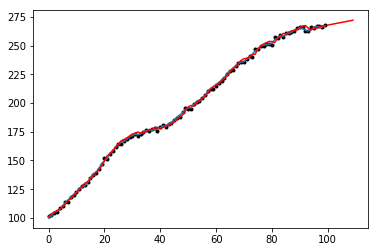

In [7]:
# fit 
fit = Holt(x).fit()
xhat = fit.fittedvalues

# forecast, too!
xhat = fit.fittedvalues
l = 10 # how far out to forecast
forecast = fit.forecast(l)

# plot with forecast
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')
plt.plot(range(n,n+l), forecast, color='red')

# Holt-Winters: Add seasonality, too!

Let's show how to use the `ExponentialSmoothing` class to control how we fit the level, slope, and seasonality.

In [8]:
ExponentialSmoothing?

In [9]:
# call method with just a timeseries 
# -> fits a model with just a level (no slope or seasonality) 
# -> learns the smoothing_level parameter
model = ExponentialSmoothing(x).fit()
model.params

{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 101.94691235435262,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [10]:
# you can control the smoothing_level parameter yourself if you prefer
model = ExponentialSmoothing(x).fit(smoothing_level=0.2)
model.params

{'smoothing_level': 0.2,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 109.28404897734714,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [11]:
# can also add an (additive or multiplicative) trend 
model = ExponentialSmoothing(x, trend='add').fit()
model.params

{'smoothing_level': 0.564876112854682,
 'smoothing_slope': 0.2664848053416782,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 99.33741353900434,
 'initial_slope': 1.8283883366646119,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [12]:
# you can control the smoothing_level and smoothing_slope parameters yourself if you prefer
model = ExponentialSmoothing(x).fit(smoothing_level=0.2,smoothing_slope=.5) 
model.params

{'smoothing_level': 0.2,
 'smoothing_slope': 0.5,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 109.28404897734714,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [13]:
# can add a trend and seasonality
model = ExponentialSmoothing(x, trend='add', seasonal='mul', seasonal_periods=12).fit()
model.params

{'smoothing_level': 0.3404114421875297,
 'smoothing_slope': 0.23224590465745748,
 'smoothing_seasonal': 0.6595884862570732,
 'damping_slope': nan,
 'initial_level': 193.21338022889913,
 'initial_slope': 2.497465754715162,
 'initial_seasons': array([0.49710715, 0.49705748, 0.49885479, 0.49643442, 0.49676417,
        0.49350273, 0.49885563, 0.49664244, 0.5039618 , 0.50073195,
        0.50418324, 0.50611318]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [14]:
# can control parameters explicitly
# -> can control some parameters and optimize over others
model = ExponentialSmoothing(x, trend='add', seasonal='mul', seasonal_periods=12)
model.fit(smoothing_seasonal=.5)
model.params

{'smoothing_level': 0.49999999343174306,
 'smoothing_slope': 0.12830341830824513,
 'smoothing_seasonal': 0.5,
 'damping_slope': nan,
 'initial_level': 193.21234660716877,
 'initial_slope': 2.4997638081992304,
 'initial_seasons': array([0.5053716 , 0.50464076, 0.50425122, 0.49995035, 0.50089961,
        0.49718499, 0.50085851, 0.50011731, 0.50429071, 0.50083983,
        0.50362699, 0.50739154]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Application: predicting co2 levels

In [15]:
from sklearn import datasets

In [16]:
co2 = sm.datasets.co2.load()

In [17]:
co2 = pd.DataFrame(co2.data)
co2.head()

,date,co2
0,b'19580329',316.1
1,b'19580405',317.3
2,b'19580412',317.6
3,b'19580419',317.5
4,b'19580426',316.4


In [18]:
dates = [pd.to_datetime(int(d), format = '%Y%m%d') for d in co2['date']]
co2['date'] = dates
co2.head()

,date,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


# Application: predicting sales

In [19]:
pd.read_csv("SalesAndForecastsTimeSeries.csv")

,ID,PartNumber,MonthNumber,Year,Sales,ForecastSalesNextMonth,ForecastTwoMonthsOut
0,1,285210,4,2000,14268,8793.0,NaN
1,2,285280,4,2000,2321,NaN,NaN
2,3,285330,4,2000,13244,8610.0,NaN
3,4,285430,4,2000,2014,3808.0,NaN
4,5,285440,4,2000,1416,3098.0,NaN
5,6,285450,4,2000,4260,10730.0,NaN
6,7,285720,4,2000,714,806.0,NaN
7,8,285730,4,2000,1642,2614.0,NaN
8,9,285750,4,2000,1858,3298.0,NaN
9,10,285800,4,2000,26746,2067.0,NaN
